
**We will use a data frame with 777 observations on the following 18 variables.**

Private A factor with levels No and Yes indicating private or public university

Apps Number of applications received

Accept Number of applications accepted

Enroll Number of new students enrolled

F.Undergrad Number of fulltime undergraduates

P.Undergrad Number of parttime undergraduates

Outstate Out-of-state tuition

Room.Board Room and board costs

Books Estimated book costs

Personal Estimated personal spending

PhD Pct. of faculty with Ph.D.’s

Terminal Pct. of faculty with terminal degree

S.F.Ratio Student/faculty ratio

perc.alumni Pct. alumni who donate

Expend Instructional expenditure per student
Grad.Rate Graduation rate

**Import Libraries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [14]:
#load the data
df=pd.read_csv('Downloads/College.csv')

In [15]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
#Checking the shape of the data
df.shape

(777, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

**Renaming the column to University**

In [19]:
df=df.rename(columns = {'Unnamed: 0':'University'}, inplace = False)

In [20]:
#Set the index
df=df.set_index('University')

In [21]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Converting the values in Private variable using label Encoder**

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label=LabelEncoder()
df['Private']=label.fit_transform(df['Private'])

In [38]:
#Take the sample set of data from original data
sample=df.sample(frac=0.10,replace=False,random_state=123)
len(sample)

78

In [39]:
sample

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
University,,,,,,,,,,,,,,,,,,
Randolph-Macon Woman's College,1,696,616,169,35,66,653,56,13970,6110,370,920,88,97,9.2,24,16358,68
Guilford College,1,1202,1054,326,18,44,1410,299,13404,5160,450,1050,78,86,15.6,30,9114,65
University of Wisconsin-Stout,0,2593,1966,1030,9,32,6038,579,6704,2592,376,1750,78,78,21.0,17,6254,65
Saint Xavier University,1,785,647,295,15,65,1670,726,10860,4624,600,794,87,100,13.7,15,8953,55
Saint John's University,1,933,800,444,18,45,1691,72,12247,4081,500,600,76,85,12.0,38,9853,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morehouse College,1,3708,1678,722,41,66,2852,153,7050,5490,250,600,71,74,17.8,10,8122,83
Wellesley College,1,2895,1249,579,80,96,2195,156,18345,5995,500,700,94,98,10.6,51,21409,91
Lawrence University,1,1243,947,324,50,77,1129,74,17163,3891,525,975,76,92,10.1,57,13965,77


**Creating the DataFrame**

In [40]:
DM=pd.DataFrame(distance_matrix(sample.values,sample.values),index=sample.index,columns=sample.index)

**Exporting to csv file**

In [61]:
DM.to_csv('DM2.csv')

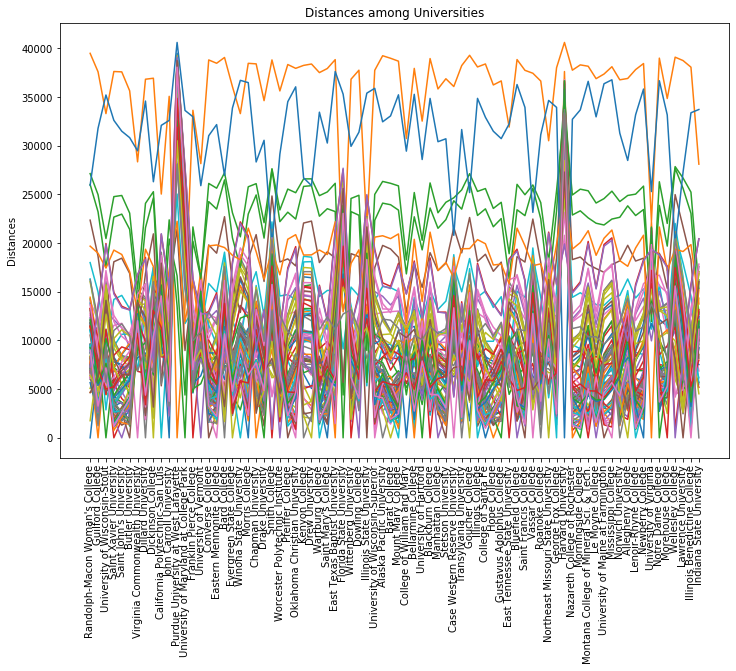

In [46]:
#Plotting 
plt.figure(figsize=(12,8))
plt.plot(DM)
plt.ylabel('Distances')
plt.grid(False)
plt.xticks(rotation=90)
plt.title('Distances among Universities')
plt.show()

**Scaling the Data**

In [36]:
data_scaled=StandardScaler().fit_transform(df)
data_scaled

array([[ 6.12553050e-01, -3.46881819e-01, -3.21205453e-01, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [ 6.12553050e-01, -2.10884040e-01, -3.87029908e-02, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [ 6.12553050e-01, -4.06865631e-01, -3.76317928e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [ 6.12553050e-01, -2.33895071e-01, -4.23771558e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 6.12553050e-01,  1.99171118e+00,  1.77256262e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [ 6.12553050e-01, -3.26765760e-03, -6.68715889e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [47]:
plt.figure(figsize=(10,8))

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
wcss  

[13986.0,
 11114.277674353794,
 8739.886390743468,
 7788.402904466629,
 7039.346795274194,
 6699.238766349741,
 6441.041826464429,
 6186.7350285115635,
 5957.172319729573,
 5765.926214313407]

<Figure size 720x576 with 0 Axes>

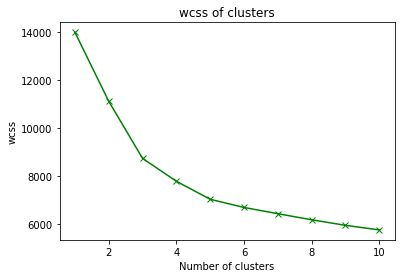

In [48]:
plt.plot(range(1,11),wcss,'gx-')
plt.title('wcss of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

**From the above plot we are considering 5 clusters **

In [49]:
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(data_scaled)
clusters

array([2, 2, 2, 1, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 0, 1, 0,
       2, 4, 3, 0, 3, 4, 2, 3, 2, 3, 2, 2, 3, 2, 1, 1, 3, 3, 3, 3, 2, 2,
       3, 0, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 0, 2, 2, 4, 1, 4, 2, 3, 1, 2,
       2, 2, 3, 4, 1, 1, 1, 3, 3, 2, 3, 3, 4, 0, 3, 2, 2, 3, 3, 2, 1, 1,
       3, 2, 3, 1, 0, 2, 3, 2, 3, 2, 2, 3, 2, 3, 0, 0, 0, 2, 3, 3, 3, 3,
       3, 2, 0, 2, 1, 3, 2, 3, 4, 0, 3, 3, 1, 1, 3, 0, 2, 3, 2, 3, 3, 3,
       3, 2, 2, 2, 3, 1, 1, 3, 1, 4, 0, 3, 1, 2, 2, 2, 2, 1, 3, 3, 3, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 3, 3, 3, 0, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3,
       4, 0, 2, 2, 0, 0, 2, 2, 3, 3, 3, 3, 2, 2, 3, 1, 0, 3, 3, 0, 3, 0,
       2, 2, 3, 4, 2, 4, 2, 3, 0, 0, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 0, 1,
       2, 1, 4, 0, 2, 1, 2, 3, 3, 2, 3, 2, 2, 0, 2, 2, 2, 1, 3, 3, 3, 2,
       1, 3, 3, 2, 3, 2, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 3, 2, 3, 4, 3, 2, 2, 0, 4, 0, 3, 4, 3, 4, 2, 0, 2, 3, 1, 0,
       2, 3, 4, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2,

In [52]:
Final_clusters=clusters+1
cluster=list(Final_clusters)
df['member']=cluster
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,member
University,,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,3
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,3
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,3
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,3


**Calculating the silhouette score**

In [81]:
print(f'sil score(n=5): {silhouette_score(data_scaled,cluster)}')

sil score(n=5): 0.18814702294682326


In [64]:
sample_silhouette_values=silhouette_samples(data_scaled,cluster)
sample_silhouette_values=pd.DataFrame(sample_silhouette_values)
sample_silhouette_values.to_csv('Downloads/sil_values5.csv')

In [66]:
df['sil_score']=sample_silhouette_values
df.to_csv('Downloads/college1.csv')


In [67]:
data1=pd.read_csv('Downloads/college1.csv')
data1=pd.DataFrame(data1)

In [68]:
data1.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,member,sil_score
0,Angelo State University,0,3540,2001,1016,24,54,4190,1512,5130,...,500,2000,60,62,23.1,5,4010,34,1,0.249888
1,Appalachian State University,0,7313,4664,1910,20,63,9940,1035,6806,...,96,2000,83,96,18.3,14,5854,70,1,0.205776
2,Arkansas Tech University,0,1734,1729,951,12,52,3602,939,3460,...,450,1000,57,60,19.6,5,4739,48,1,0.180938
3,Bemidji State University,0,1208,877,546,12,36,3796,824,4425,...,660,1800,57,62,19.6,16,3752,46,1,0.153524
4,Bloomsburg Univ. of Pennsylvania,0,6773,3028,1025,15,55,5847,946,7844,...,500,1680,66,68,18.0,19,7041,75,1,0.217333


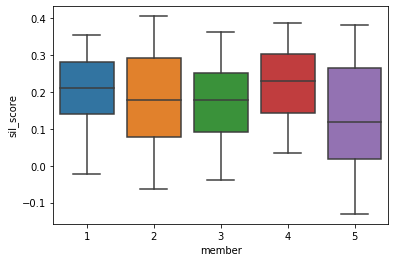

In [69]:
#plotting the box plot for no of clusters
sns.boxplot(x='member',y='sil_score',data=data1)
plt.show()

In [82]:
num_clusters=5
sample_silhouette_values=silhouette_samples(data_scaled,cluster)

means_list=[]
for i in range(num_clusters):
    means_list.append(round(sample_silhouette_values[i==clusters].mean(),2))
print(means_list) 

[0.2, 0.18, 0.17, 0.22, 0.13]


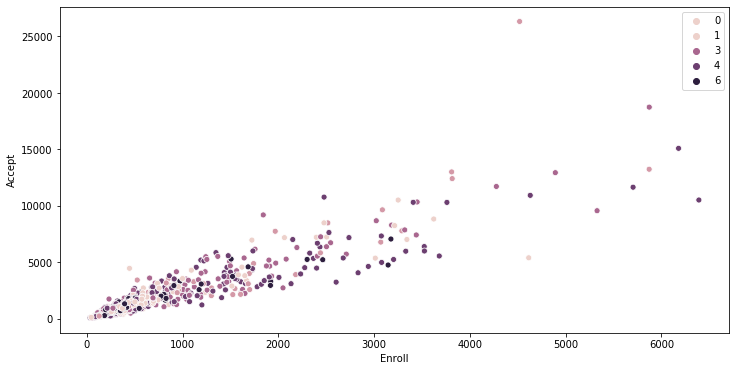

In [83]:
plt.figure(figsize=(12,6))
sns.scatterplot(data1['Enroll'],data1['Accept'],hue=Final_clusters)
plt.show()

We have classified the given data into 5 groups. The representation is shown in the above scatter plot.